# RoadMap 12 - NN - Containers
    
    1. Sequential
    2. Model Class

In [1]:
import os
import sys
import torch
import numpy as np

In [2]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

torch.Size([1, 3, 576, 768])


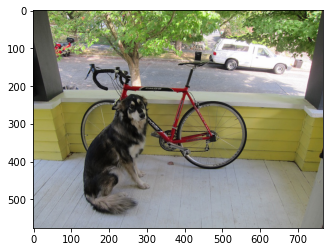

In [3]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

## Base Module Class

Class - torch.nn.Module
    
    1. Base class for all neural network modules.
    
    2. All models should also subclass this class.
    
    3. Modules can also contain other Modules, allowing to nest them in a tree structure. 
    
    
    
Functions

    1. add_module - Adds a child module to the current module.
            - name (string) – name of the child module. The child module can be accessed from this module using the given name
            - parameter (Module) – child module to be added to the module.
            
    2. apply - Applies a function recursively to every submodule (as returned by .children()) as well as self. 
            - fn (Module -> None) – function to be applied to each submodule
            
    3. children - Returns an iterator over immediate children modules.
    
    4. cpu - Moves all model parameters and buffers to the CPU.
    
    5. cuda - Moves all model parameters and buffers to the GPU. This also makes associated parameters and buffers different objects. So it should be called before constructing optimizer if the module will live on GPU while being optimized.
            - device (int, optional) – if specified, all parameters will be copied to that device
            
    6. double - Casts all floating point parameters and buffers to double datatype.
    
    7. eval - Sets the module in evaluation mode.
    
    8. extra_repr - Set the extra representation of the module
    
    9. float - Casts all floating point parameters and buffers to float datatype.
    
    10. forward - Defines the computation performed at every call.
    
    11. half - Casts all floating point parameters and buffers to half datatype.
    
    12. load_state_dict - Copies parameters and buffers from state_dict into this module and its descendants. If strict is True, then the keys of state_dict must exactly match the keys returned by this module’s state_dict() function.
            - state_dict (dict) – a dict containing parameters and persistent buffers.
            - strict (bool, optional) – whether to strictly enforce that the keys in state_dict match the keys returned by this module’s state_dict() function. Default: True

    13. modules() - Returns an iterator over all modules in the network. 


In [4]:
import torch.nn as nn
import torch.nn.functional as F

'''
input -> conv2d -> relu -> conv2d -> relu -> output
'''
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))

In [5]:
m = Model()
print(dir(m))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_buffers', '_forward_hooks', '_forward_pre_hooks', '_get_name', '_load_from_state_dict', '_load_state_dict_pre_hooks', '_modules', '_named_members', '_parameters', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_state_dict_hooks', '_version', 'add_module', 'apply', 'bfloat16', 'buffers', 'children', 'conv1', 'conv2', 'cpu', 'cuda', 'double', 'dump_patches', 'eval', 'extra_repr', 'float', 'forward', 'half', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules

In [6]:
"Printing model"
print(m)

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)


In [7]:
"Printing model childrens"
print(m.children)

<bound method Module.children of Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)>


## Sequential class

A sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an ordered dict of modules can also be passed in.

In [8]:
# Example squential network

model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

print(model)


Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)


### Module List and Module Dictionaries

1. Module List - Holds submodules in a list. ModuleList can be indexed like a regular Python list, but modules it contains are properly registered, and will be visible by all Module methods.

2. Module Dict - Holds submodules in a dictionary. ModuleDict can be indexed like a regular Python dictionary, but modules it contains are properly registered, and will be visible by all Module methods.

In [9]:
# Module list

class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

module_list_example = MyModule()
print(module_list_example)

MyModule(
  (linears): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): Linear(in_features=10, out_features=10, bias=True)
  )
)


In [10]:
# Module dict

class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.choices = nn.ModuleDict({
                'conv': nn.Conv2d(10, 10, 3),
                'pool': nn.MaxPool2d(3)
        })
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['prelu', nn.PReLU()]
        ])

    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activations[act](x)
        return x
    
module_dict_example = MyModule()
print(module_dict_example)

MyModule(
  (choices): ModuleDict(
    (conv): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (activations): ModuleDict(
    (lrelu): LeakyReLU(negative_slope=0.01)
    (prelu): PReLU(num_parameters=1)
  )
)


# RoadMap 14 - Classification 1 - Pytorch model zoo

    1. Available Models

    2. Using models for image classification


In [11]:
import torchvision.models as models

# 1. Models
    
    1. Alexnet
    2. Vgg11
    3. Vgg11 With batch normalization
    4. Vgg13
    5. Vgg13 with batch normalization
    6. Vgg16
    7. Vgg16 with batch normalization
    8. Vgg19
    9. Vgg19 with batch normalization
    10. Resnet-18
    11. Resnet-34
    12. Resnet-50
    13. Resnet-101
    14. Resnet-152
    15. Squeezenet-1.0
    16. Squeezenet-1.1
    17. Densenet-121
    18. Densenet-161
    19. Densenet-169
    20. Densenet-201
    21. Inception-v3
    
    
# 2. Using a model for Image Classification

    1. Alexnet
    2. Vgg11
    3. Vgg13
    4. Vgg16
    5. Vgg19
    6. Squeezenet-1.1
    

In [12]:
import torch

In [13]:
# Understanding models

In [14]:
# untrained model
alexnet = models.alexnet()

In [15]:
d = torch.rand(1, 3, 224, 224)
o = alexnet(d)
 
onnx_path = "onnx_model_name.onnx"
torch.onnx.export(alexnet, d, onnx_path)
 
netron.start(onnx_path)

NameError: name 'netron' is not defined

In [ ]:
print(dir(alexnet))

In [16]:
# Pre-trained model
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\Divyansh Choubisa/.cache\torch\checkpoints\alexnet-owt-4df8aa71.pth


In [17]:
# Other models

#vgg11 = models.vgg11(pretrained=True)
#vgg11_bn = models.vgg11_bn(pretrained=True)
#vgg13 = models.vgg13(pretrained=True)
#vgg13_bn = models.vgg13_bn(pretrained=True)
#vgg16 = models.vgg16(pretrained=True)
#vgg16_bn = models.vgg16_bn(pretrained=True)
#vgg19 = models.vgg19(pretrained=True)
#vgg19_bn = models.vgg19_bn(pretrained=True)
#resnet18 = models.resnet18(pretrained=True)
#resnet34 = models.resnet34(pretrained=True)
#resnet50 = models.resnet50(pretrained=True)
#resnet101 = models.resnet101(pretrained=True)
#resnet152 = models.resnet152(pretrained=True)
#squeezenet1_0 = models.squeezenet1_0(pretrained=True)
#squeezenet1_1 = models.squeezenet1_1(pretrained=True)
#densenet121 = models.densenet121(pretrained=True)
#densenet161 = models.densenet161(pretrained=True)
densenet169 = models.densenet169(pretrained=True)
densenet201 = models.densenet201(pretrained=True)
inception_v3 = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to C:\Users\Divyansh Choubisa/.cache\torch\checkpoints\densenet169-b2777c0a.pth


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to C:\Users\Divyansh Choubisa/.cache\torch\checkpoints\densenet201-c1103571.pth


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to C:\Users\Divyansh Choubisa/.cache\torch\checkpoints\inception_v3_google-1a9a5a14.pth


## Using pre-trained models for image classification

In [ ]:
import io
import requests
import time
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable

In [ ]:
# Getting image and labels
'''
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
IMG_URL = 'https://s3.amazonaws.com/outcome-blog/wp-content/uploads/2017/02/25192225/cat.jpg'
response = requests.get(IMG_URL)
img_pil = Image.open(io.BytesIO(response.content))
labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}
'''

In [ ]:
# Creating preprocessing transformations

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])


In [ ]:
# Preprocess Image
img_tensor = preprocess(img_pil)
print(img_tensor.shape)

In [ ]:
# Alexnet

# Initialize model
model = models.alexnet(pretrained=True)

# Applying a forward pass
# The input to the network needs to be an autograd Variable. 
# To make it 4 dimension use unsqueeze
input_data = img_tensor.unsqueeze(0)
img_variable = Variable(input_data)
start = time.time()
fc_out = model(img_variable)
time_d = time.time() - start

print("Using Alexnet classifier")
print("Predicted Label: ", labels[fc_out.data.numpy().argmax()])
print("Time Taken: ", time_d, " seconds")

In [ ]:
# VGG11

# Initialize model
model = models.vgg11(pretrained=True)

# Applying a forward pass
# The input to the network needs to be an autograd Variable. 
# To make it 4 dimension use unsqueeze
input_data = img_tensor.unsqueeze(0)
img_variable = Variable(input_data)
start = time.time()
fc_out = model(img_variable)
time_d = time.time() - start

print("Using VGG11 classifier")
print("Predicted Label: ", labels[fc_out.data.numpy().argmax()])
print("Time Taken: ", time_d, " seconds")

In [ ]:
# VGG13

# Initialize model
model = models.vgg13(pretrained=True)

# Applying a forward pass
# The input to the network needs to be an autograd Variable. 
# To make it 4 dimension use unsqueeze
input_data = img_tensor.unsqueeze(0)
img_variable = Variable(input_data)
start = time.time()
fc_out = model(img_variable)
time_d = time.time() - start

print("Using VGG13 classifier")
print("Predicted Label: ", labels[fc_out.data.numpy().argmax()])
print("Time Taken: ", time_d, " seconds")

In [ ]:
# VGG16

# Initialize model
model = models.vgg16(pretrained=True)

# Applying a forward pass
# The input to the network needs to be an autograd Variable. 
# To make it 4 dimension use unsqueeze
input_data = img_tensor.unsqueeze(0)
img_variable = Variable(input_data)
start = time.time()
fc_out = model(img_variable)
time_d = time.time() - start

print("Using VGG16 classifier")
print("Predicted Label: ", labels[fc_out.data.numpy().argmax()])
print("Time Taken: ", time_d, " seconds")

In [ ]:
# VGG19

# Initialize model
model = models.vgg19(pretrained=True)

# Applying a forward pass
# The input to the network needs to be an autograd Variable. 
# To make it 4 dimension use unsqueeze
input_data = img_tensor.unsqueeze(0)
img_variable = Variable(input_data)
start = time.time()
fc_out = model(img_variable)
time_d = time.time() - start

print("Using VGG19 classifier")
print("Predicted Label: ", labels[fc_out.data.numpy().argmax()])
print("Time Taken: ", time_d, " seconds")

In [ ]:
# Squeezenet-v1.1

# Initialize model
model = models.squeezenet1_1(pretrained=True)

# Applying a forward pass
# The input to the network needs to be an autograd Variable. 
# To make it 4 dimension use unsqueeze
input_data = img_tensor.unsqueeze(0)
img_variable = Variable(input_data)
start = time.time()
fc_out = model(img_variable)
time_d = time.time() - start

print("Using Suqeezenet v1.1 classifier")
print("Predicted Label: ", labels[fc_out.data.numpy().argmax()])
print("Time Taken: ", time_d, " seconds")